In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('00_Data/relevant_data_v1.csv')
data

,SCRAM,EST_ST,EST_MSA,TBIRTH_YEAR,ARACE,EGENID_BIRTH,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,...,FRMLA_AGE,BABY_FED,MHLTH_NEED,MHLTH_GET,MHLTH_SATISFD,MHLTH_DIFFCLT,SOCIAL1,SOCIAL2,CURFOODSUF,EEDUC
0,P090000004,48,19100.0,1970,2,2,1,2,0,1,...,-88,-88,-88,-88,-88,-88,2,4,2,6
1,P090000005,12,NaN,1958,2,1,1,2,0,1,...,-88,-88,-88,-88,-88,-88,5,5,1,3
2,P090000009,17,16980.0,1955,2,2,2,2,0,2,...,-88,-88,-88,-88,-88,-88,2,4,1,5
3,P090000011,4,38060.0,1961,2,2,3,2,0,3,...,-88,-88,-88,-88,-88,-88,2,4,2,6
4,P090000014,22,NaN,1992,2,2,4,2,2,2,...,-88,-88,2,1,1,3,3,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,P090051256,34,35620.0,1960,2,2,6,2,3,3,...,-88,-88,3,-88,-88,-88,5,5,-88,4
49996,P090051256,34,35620.0,1960,2,2,6,2,3,3,...,-88,-88,3,-88,-88,-88,5,5,-88,4
49997,P090051258,24,47900.0,1984,2,2,3,2,1,2,...,-88,-88,3,-88,-88,-88,2,2,3,7
49998,P090051258,24,47900.0,1984,2,2,3,2,1,2,...,-88,-88,3,-88,-88,-88,2,2,3,7


In [3]:
data['EEDUC'].unique()

array([6, 3, 5, 7, 4, 2, 1])

In [4]:
df_cleaned = data[['EEDUC', 'SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'SELFCARE', 'UNDERSTAND']]
df_cleaned

,EEDUC,SEEING,HEARING,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND
0,6,1,1,1,1,1,1
1,3,3,1,1,1,1,1
2,5,1,1,1,1,1,1
3,6,2,1,1,1,1,1
4,5,3,2,3,2,1,1
...,...,...,...,...,...,...,...
49995,4,1,1,2,1,1,1
49996,4,1,1,2,1,1,1
49997,7,1,1,1,1,1,1
49998,7,1,1,1,1,1,1


In [5]:
# Define the categorical columns for analysis
categorical_columns = ['EEDUC', 'SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'SELFCARE', 'UNDERSTAND']

Number of -88 & -99 answers: 
EEDUC            0
SEEING         525
HEARING        739
REMEMBERING    622
MOBILITY       616
SELFCARE       623
UNDERSTAND     595
dtype: int64

Number of samples after data cleaning:  48984


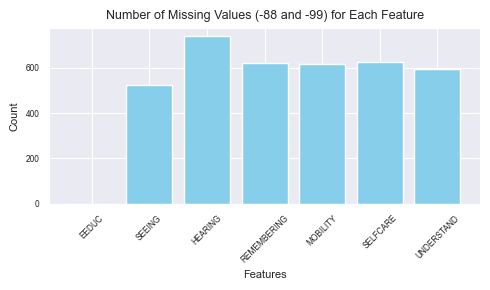

In [6]:
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')

# Count -88 and -99 values for each feature
missing_counts = df_cleaned[categorical_columns].isin([-88, -99]).sum()
print("Number of -88 & -99 answers: ")
print(missing_counts)
print("")
# Calculate the number of samples left after excluding -88 and -99
samples_left = len(df_cleaned) - df_cleaned[categorical_columns].isin([-88, -99]).any(axis=1).sum()
print("Number of samples after data cleaning: ",samples_left)

# Plot the number of -88 and -99 values for each feature
# Convert missing counts to a Pandas Series if it's not already
missing_counts_series = pd.Series(missing_counts, index=categorical_columns)

# Convert to a dictionary for manual plotting
missing_counts_dict = missing_counts.to_dict()

# Plot using matplotlib
plt.figure(figsize=(5, 3))
plt.bar(missing_counts_dict.keys(), missing_counts_dict.values(), color='skyblue')
plt.title('Number of Missing Values (-88 and -99) for Each Feature', fontsize=9)
plt.xlabel('Features', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.yticks(fontsize=6)
plt.xticks(rotation=45, fontsize=6)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [7]:
# Exclude rows with -88 and -99 in any categorical column
filtered_data = df_cleaned[~df_cleaned[categorical_columns].isin([-88, -99]).any(axis=1)]

In [8]:
# Descriptive analysis on filtered data
# Summary statistics
def calculate_summary_stats(data, columns):
    summary = {}
    for col in columns:
        counts = data[col].value_counts().sort_index()
        proportions = counts / len(data)
        summary[col] = pd.DataFrame({'Count': counts, 'Proportion': proportions})
    return summary

summary_stats_filtered = calculate_summary_stats(filtered_data, categorical_columns)
summary_stats_filtered

{'EEDUC':        Count  Proportion
 EEDUC                   
 1       1004    0.020496
 2       2124    0.043361
 3      14694    0.299976
 4       9720    0.198432
 5       4506    0.091989
 6       9203    0.187878
 7       7733    0.157868,
 'SEEING':         Count  Proportion
 SEEING                   
 1       33676    0.687490
 2       13760    0.280908
 3        1418    0.028948
 4         130    0.002654,
 'HEARING':          Count  Proportion
 HEARING                   
 1        40664    0.830149
 2         7334    0.149722
 3          891    0.018190
 4           95    0.001939,
 'REMEMBERING':              Count  Proportion
 REMEMBERING                   
 1            33076    0.675241
 2            13883    0.283419
 3             1942    0.039646
 4               83    0.001694,
 'MOBILITY':           Count  Proportion
 MOBILITY                   
 1         36540    0.745958
 2          9680    0.197616
 3          2495    0.050935
 4           269    0.005492,
 'SELFCA

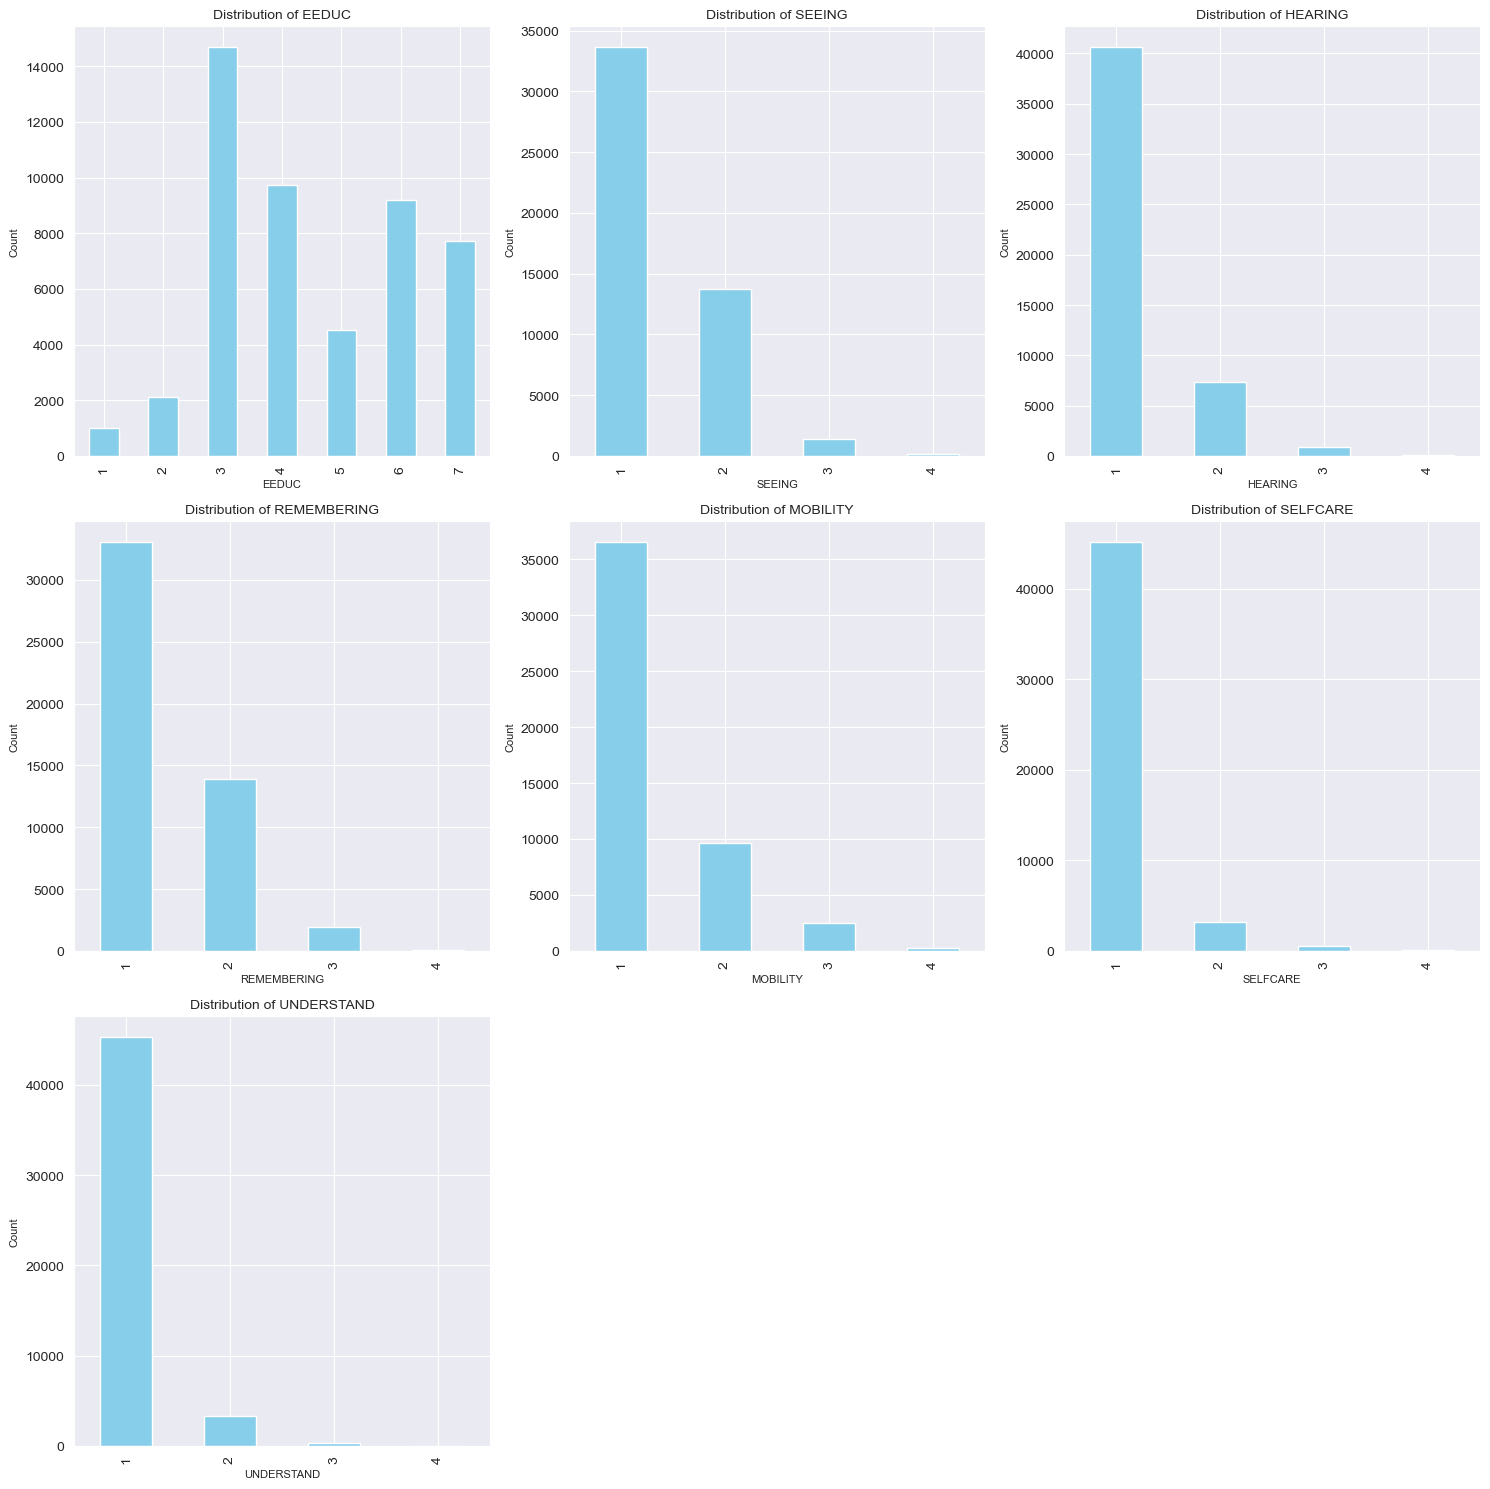

In [9]:
### 1. Bar Plots Grid ###
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Create a 3x3 grid for bar plots
axes = axes.flatten()  # Flatten for easy indexing

for i, col in enumerate(categorical_columns):
    if i < len(axes):  # Ensure we don't exceed the grid size
        filtered_data[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}', fontsize=10)
        axes[i].set_xlabel(col, fontsize=8)
        axes[i].set_ylabel('Count', fontsize=8)

# Hide unused subplots
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

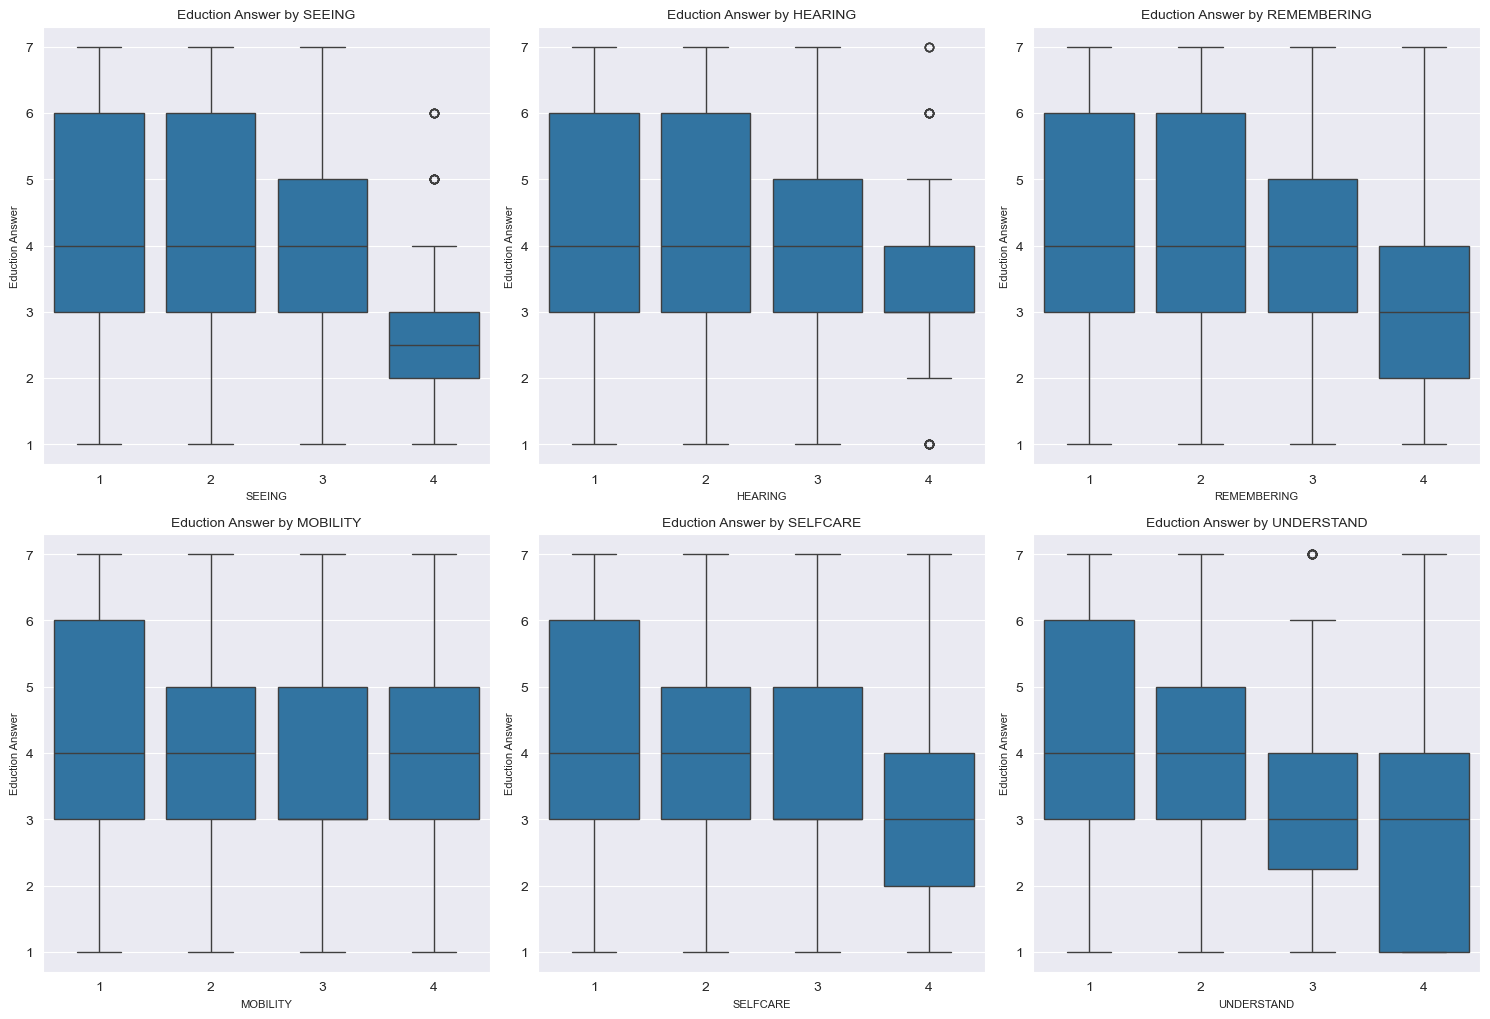

In [10]:
### 2. Box Plots Grid ###
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Create a 3x3 grid for box plots
axes = axes.flatten()

for i, col in enumerate(categorical_columns[1:]):  # Skip 'EEDUC' for box plots
    if i < len(axes):  # Ensure we don't exceed the grid size
        sns.boxplot(x=col, y='EEDUC', data=filtered_data, ax=axes[i])
        axes[i].set_title(f'Eduction Answer by {col}', fontsize=10)
        axes[i].set_xlabel(col, fontsize=8)
        axes[i].set_ylabel('Eduction Answer', fontsize=8)

# Hide unused subplots
for j in range(len(categorical_columns[1:]), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

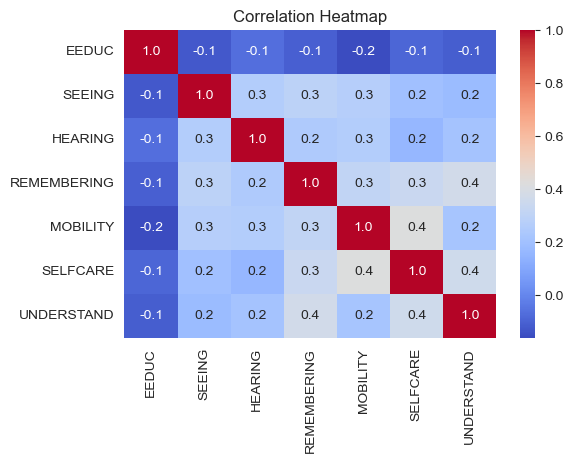

In [11]:
### 3. Correlation Heatmap ###
correlation_matrix_filtered = filtered_data.corr()
plt.figure(figsize=(6, 4))  # Standalone plot for the heatmap
sns.heatmap(correlation_matrix_filtered, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=12)
plt.show()

In [14]:
from scipy.stats import norm
import numpy as np
import pandas as pd

# Define the disability features
disability_features = ['SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'SELFCARE', 'UNDERSTAND']

# Initialize a dictionary to store results
hypothesis_results = {}

# Significance level
alpha = 0.05

# Perform hypothesis testing for each disability feature
for feature in disability_features:
    # Group data
    no_disability = filtered_data[filtered_data[feature] == 1]['EEDUC']
    disability = filtered_data[filtered_data[feature].isin([2, 3, 4])]['EEDUC']

    # Calculate means and standard errors
    mean_no_disability = round(no_disability.mean(), 2)
    mean_disability = round(disability.mean(), 2)
    std_no_disability = round(no_disability.std(), 2)
    std_disability = round(disability.std(), 2)
    n_no_disability = len(no_disability)
    n_disability = len(disability)

    # Pooled standard error
    pooled_se = round(np.sqrt((std_no_disability**2 / n_no_disability) + (std_disability**2 / n_disability)), 2)

    # Test statistic (Z-score)
    z_score = round((mean_no_disability - mean_disability) / pooled_se, 2)

    # P-value (two-tailed test)
    p_value = round(2 * (1 - norm.cdf(abs(z_score))), 2)

    # Determine significance
    significant = "Significant" if p_value < alpha else "Not Significant"

    # Store results
    hypothesis_results[feature] = {
        'mean_no_disability': mean_no_disability,
        'mean_disability': mean_disability,
        'std_no_disability': std_no_disability,
        'std_disability': std_disability,
        'n_no_disability': n_no_disability,
        'n_disability': n_disability,
        'pooled_se': pooled_se,
        'z_score': z_score,
        'p_value': p_value,
        'significant': significant
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(hypothesis_results).T
results_df.index.name = 'Feature'

# Convert counts to integers for cleaner display
int_columns = ['n_no_disability', 'n_disability']
results_df[int_columns] = results_df[int_columns].astype(int)

# Display the DataFrame
results_df


,mean_no_disability,mean_disability,std_no_disability,std_disability,n_no_disability,n_disability,pooled_se,z_score,p_value,significant
Feature,,,,,,,,,,
SEEING,4.62,4.21,1.64,1.59,33676,15308,0.02,20.5,0.0,Significant
HEARING,4.54,4.27,1.64,1.6,40664,8320,0.02,13.5,0.0,Significant
REMEMBERING,4.61,4.25,1.66,1.57,33076,15908,0.02,18.0,0.0,Significant
MOBILITY,4.64,4.05,1.63,1.56,36540,12444,0.02,29.5,0.0,Significant
SELFCARE,4.54,4.0,1.64,1.51,45156,3828,0.03,18.0,0.0,Significant
UNDERSTAND,4.54,3.86,1.63,1.52,45339,3645,0.03,22.67,0.0,Significant


/var/folders/dl/pvnxq0z5655698znkg19dljr0000gn/T/ipykernel_78860/3978970259.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/dl/pvnxq0z5655698znkg19dljr0000gn/T/ipykernel_78860/3978970259.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/dl/pvnxq0z5655698znkg19dljr0000gn/T/ipykernel_78860/3978970259.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/dl/pvnxq0z5655698znkg19dljr0000gn/T/ipykernel_78860/3978970259.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

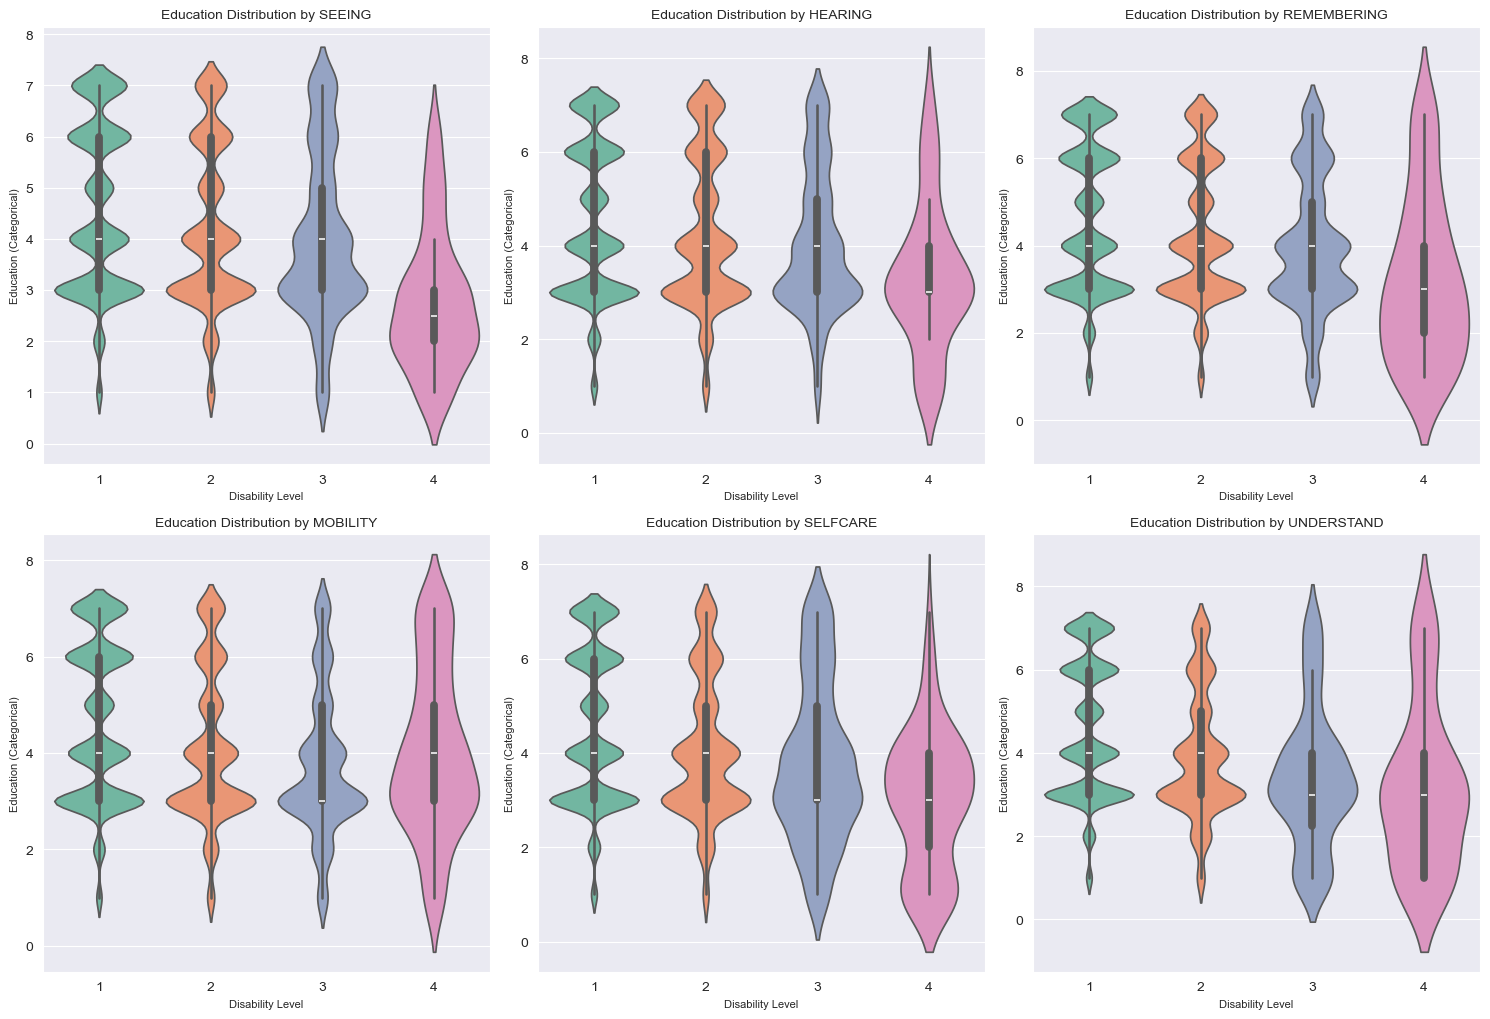

In [13]:
# Create a 3x3 grid for the violin plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust figure size
axes = axes.flatten()  # Flatten for easy indexing

# Plot violin plots for each disability feature
for i, feature in enumerate(disability_features):
    if i < len(axes):  # Ensure we don't exceed the grid size
        sns.violinplot(
            x=feature, y='EEDUC', data=filtered_data, palette='Set2', ax=axes[i]
        )
        axes[i].set_title(f'Education Distribution by {feature}', fontsize=10)
        axes[i].set_xlabel('Disability Level', fontsize=8)
        axes[i].set_ylabel('Education (Categorical)', fontsize=8)

# Hide unused subplots if any
for j in range(len(disability_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

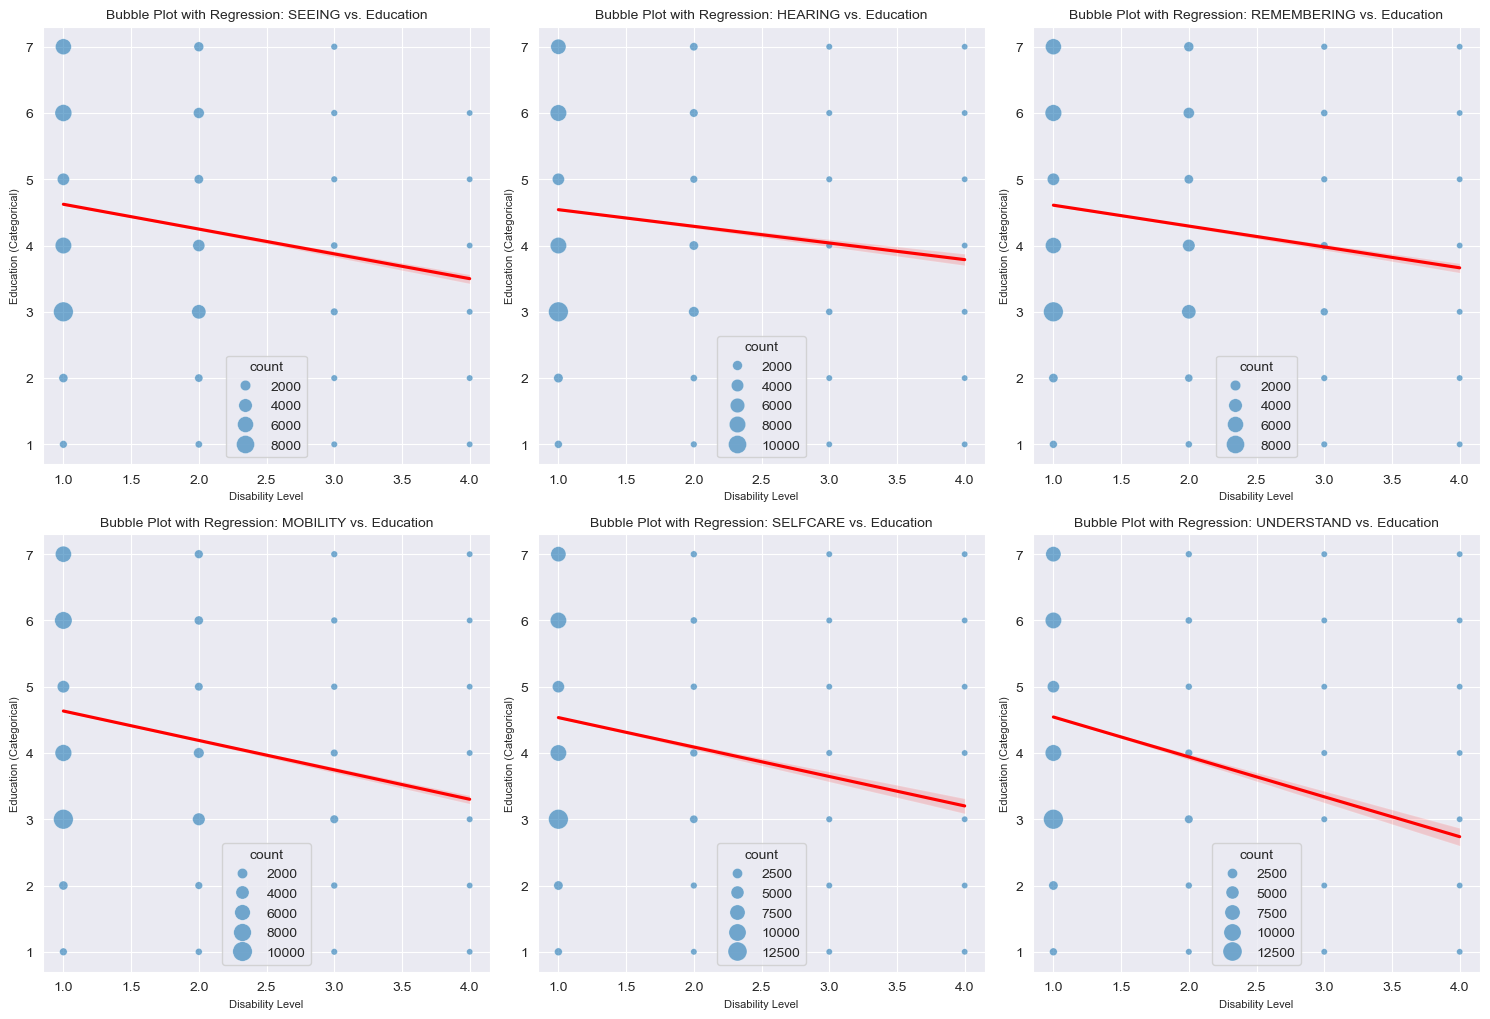

In [18]:
# Create a 3x3 grid for bubble plots with regression lines
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust figure size
axes = axes.flatten()  # Flatten for easy indexing

# Plot bubble plots with regression lines for each disability feature
for i, feature in enumerate(disability_features):
    if i < len(axes):  # Ensure we don't exceed the grid size
        # Group data to calculate sizes
        grouped = filtered_data.groupby([feature, 'EEDUC']).size().reset_index(name='count')

        # Plot regression line
        sns.regplot(
            data=filtered_data, x=feature, y='EEDUC',
            scatter=False, line_kws={'color': 'red'}, ax=axes[i]
        )

        # Plot bubble scatter
        sns.scatterplot(
            data=grouped, x=feature, y='EEDUC', size='count', sizes=(20, 200),
            alpha=0.6, ax=axes[i]
        )

        axes[i].set_title(f'Bubble Plot with Regression: {feature} vs. Education', fontsize=10)
        axes[i].set_xlabel('Disability Level', fontsize=8)
        axes[i].set_ylabel('Education (Categorical)', fontsize=8)

# Hide unused subplots
for j in range(len(disability_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()